### 取り組み課題：住宅販売価格予測
### Kaggle から kc_house_data.csv を取得
### カラムの意味/タイプ
| 変数名 | 意味 | 変数タイプ | 備考 |  
|:------:|:----:|:----------:|:----:|  
|id|データ行|Number|データ数は21613|
|date|売却された日付|文字列||
|price|住宅販売価格|Number||
|bedrooms|1戸当たりのベッドルーム数|Number|値範囲:0-33|
|bathrooms|ベッドルーム当たりの風呂数|Number|値範囲:0-8|
|sqft_living|延床面積|Number||
|sqft_lot|土地面積|Number||
|floors|階数|Number|値範囲:1-3.5|
|waterfront|水際かどうか|文字列|値範囲:0-1|
|view|眺めが良いかどうか|文字列(0-4)|値範囲:0-4|
|condition|家の状態|文字列(1-5)|値範囲:1-5|
|grade|グレード|文字列(1-13)|値範囲:1-13|
|sqft_above|地下室を除いた延床面積|Number||
|sqft_basement|地下室の延床面積|Number||
|yr_built|建築年|Number||
|yr_renovated|改修年|Number||
|zipcode|郵便番号|Number||
|lat|緯度|Number||
|long|経度|Number||
|sqft_living15|2015年時点での延床面積|Number||
|sqft_lot15|2015年時点での土地面積|Number||

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Kaggle から取得した kc_house_data.csv を読み込む
input_file = "./kc_house_data.csv"
df_data = pd.read_csv(input_file)

In [23]:
# 読み込んだ CSV ファイルのカラムを確認
print(df_data.columns)

# データの中身を確認
display(df_data.head())
display(df_data.tail())

# 住宅価格を 10^6 で割っておく
df_data["price"] = df_data["price"] / 10**6

# 統計情報を確認
display(df_data.describe(include='all'))

# 価格の表示
#display(df_data['price'].head())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,0.540088,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,0.367127,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,0.075000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,0.321950,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,0.450000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,0.645000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [24]:
# 変数間の相関性をチェックする
# 相関行列の表示
df_data.corr().style.background_gradient().format('{:.2f}')

# price に対して、bathrooms/sqft_living/grade/sqft_above/sqft_living15 辺りが高い相関を示している

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


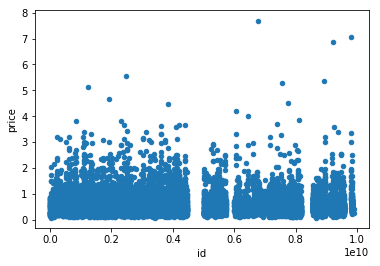

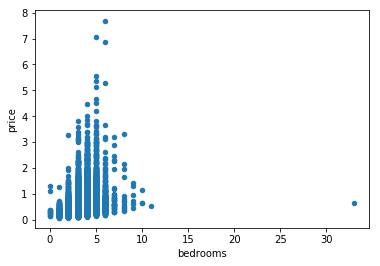

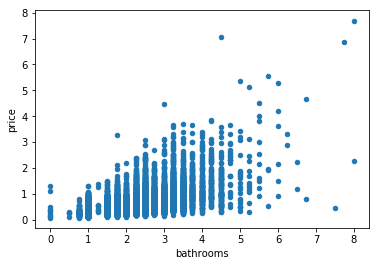

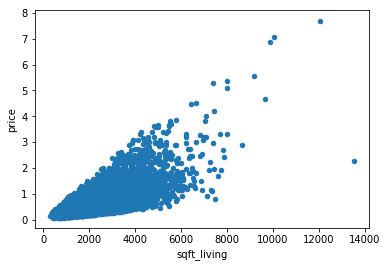

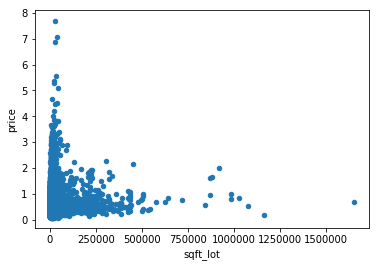

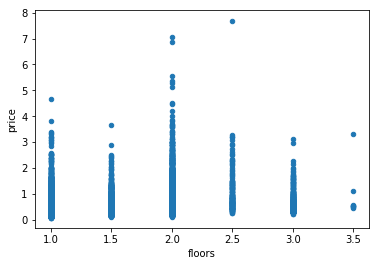

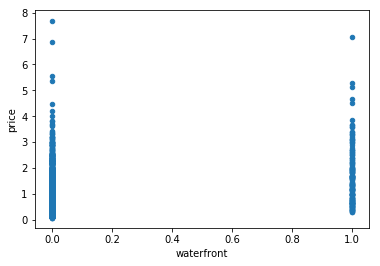

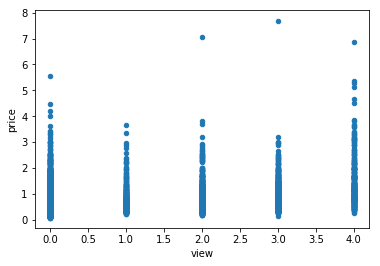

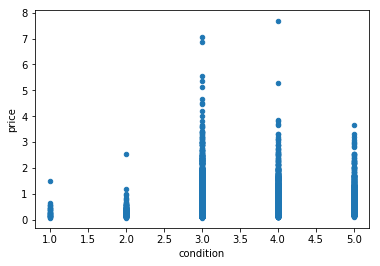

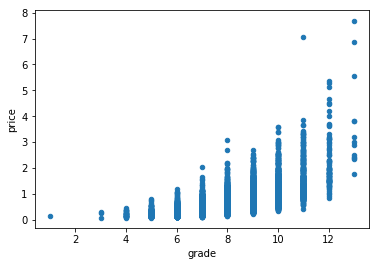

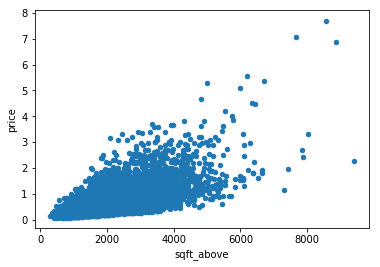

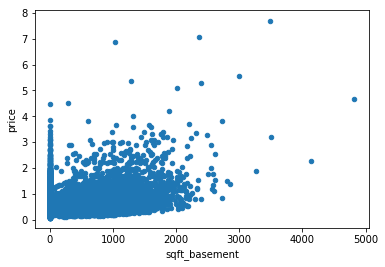

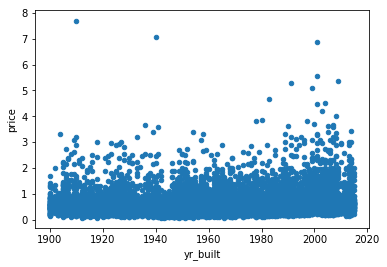

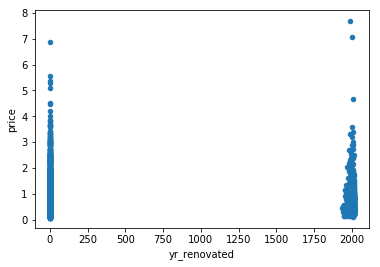

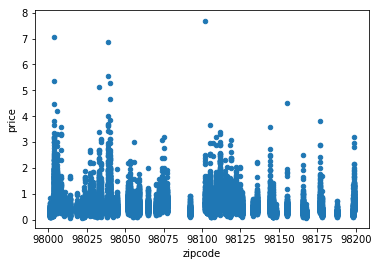

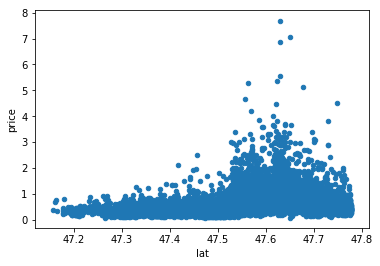

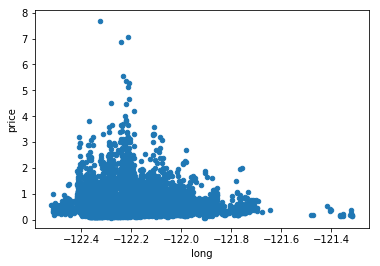

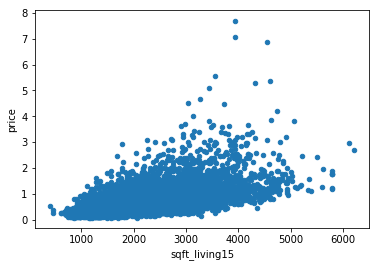

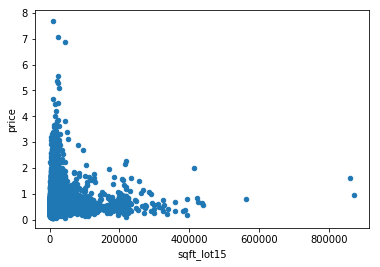

In [25]:
# さらに price に対する関係性を見るため、price x 他の変数の散布図を作成
for c in df_data.columns:
    if (c != 'price') & (c != 'date'):
        df_data[[c, 'price']].plot(kind='scatter', x=c, y='price')

### 目的変数を説明する説明変数を見つける  
先ずは、price と相関係数の高い順に考える
* 0.7 以上 -> sqft_living
* 0.6 以上 -> grade/sqft_above
* 0.5 以上 -> bathrooms/sqft_living15

ただし、sqft_above/sqft_living15 は sqft_living とほとんど同じ意味なので、これらの変数としては、sqrt_living を用いる。

In [26]:
# 欠損値を確認する
df_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [27]:
def multi_reg(X, y):
    # テストデータと訓練データの生成
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)
    print("決定係数=%s"%regr.score(X, y))
    print("傾き=%s"%regr.coef_, "切片=%s"%regr.intercept_)

    y_pred = regr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("MSE=%s"%round(mse, 3))
    print("RMSE=%s"%round(np.sqrt(mse), 3))
    print("MAE=%s"%round(mae, 3))

In [28]:
# 重回帰分析で説明することを試みる

y = df_data["price"].values
X = df_data[["sqft_living", "grade", "bathrooms"]].values

multi_reg(X, y)

決定係数=0.5370658706316407
傾き=[ 0.00020219  0.1011792  -0.03444566] 切片=-0.5831558458263613
MSE=0.069
RMSE=0.263
MAE=0.166


### 考察  
決定係数が 0.537 とあまり高くない結果が得られた。  
原因としては、以下が考えられる。
* price と他の変数の相関関係を見るときに、延床面積の影響が高すぎるため、相関関係が見えない、精度が上がらないのではないか。  
  -> price/sqft_living を定義しなおし、他の変数との相関関係を探る。  
* ある特定の地域の住宅価格が高いことはないか。  
  -> zipcode, lat, long の組み合わせを見てみる価値はあるかも。
* 地下室面積を変数とするのではなく、地下室があるかどうかを判断材料とするのはどうか。
* 改修年を変数とするのではなく、改修したかどうかを判断材料とするのはどうか。
* 建築年を変数とするのではなく、建築年でクラス分けして、変数とするのはどうか。  
  -> 1: 1900-1920, 2: 1920-1940, 3: 1940-1960 ...
* 外れ値の除去を試みた場合、全体の精度は上がるかどうか。

In [29]:
# 延床面積当たりを考える。
#df_data["price_per_sqft_living"] = df_data["price"] / df_data["sqft_living_norm"]
df_data["price_per_sqft_living"] = df_data["price"] / df_data["sqft_living"]
df_data["price_per_sqft_living"].describe()

# 変数間の相関性をチェックする
# 相関行列の表示
df_data.corr().style.background_gradient().format('{:.2f}')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14,-0.01
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,0.55
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,-0.21
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,-0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,-0.09
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,-0.03
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.00
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.19
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.22
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,0.10


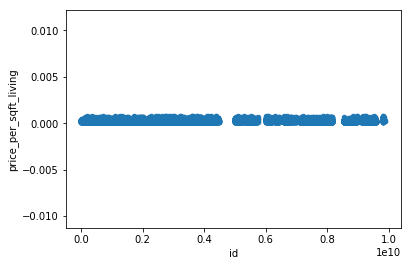

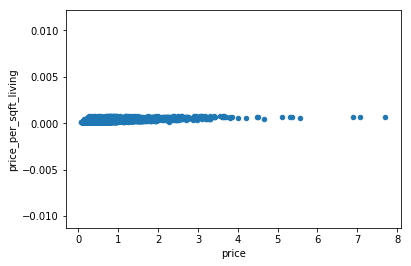

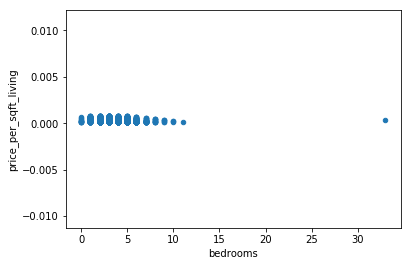

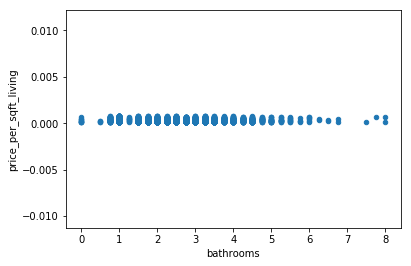

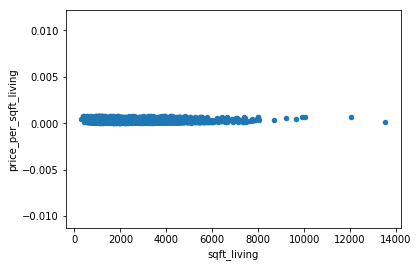

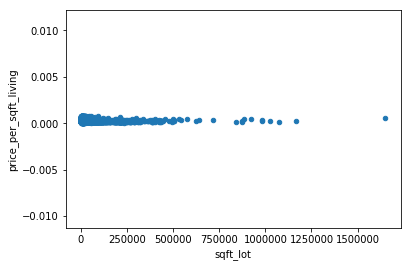

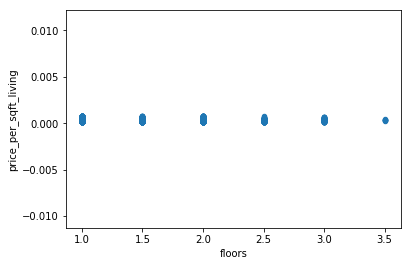

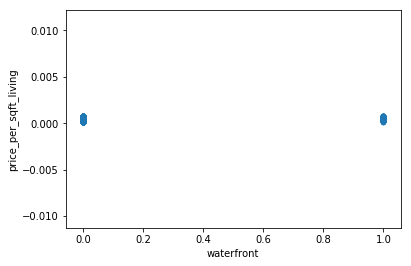

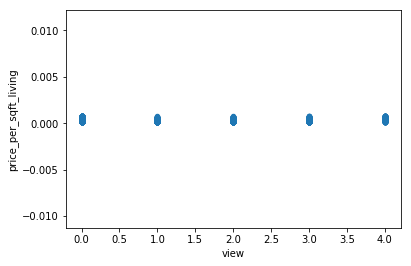

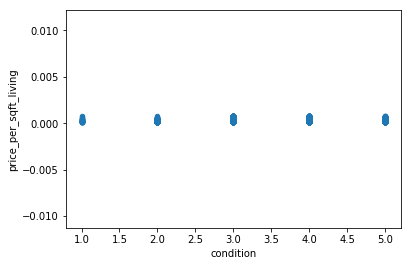

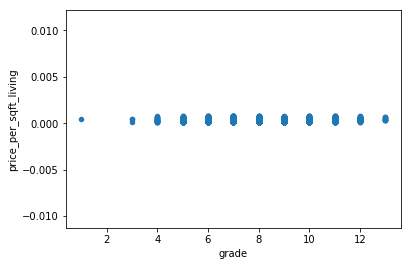

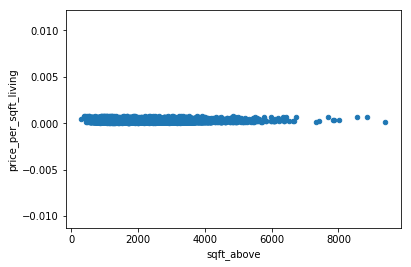

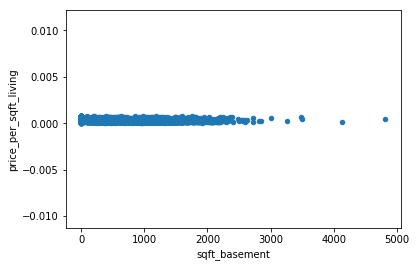

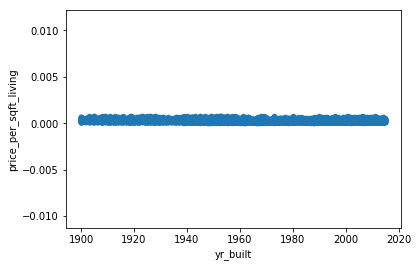

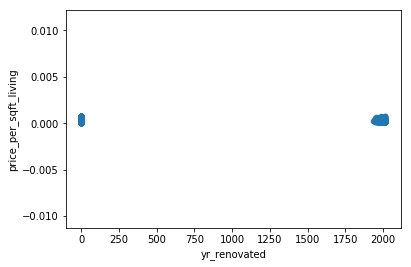

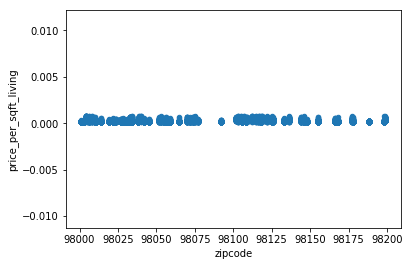

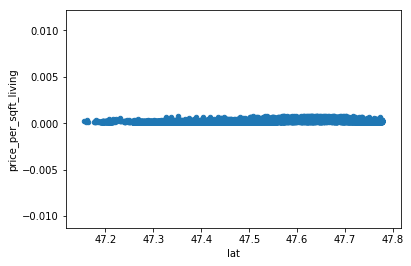

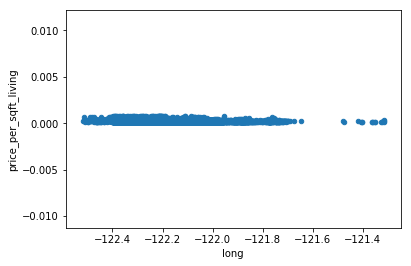

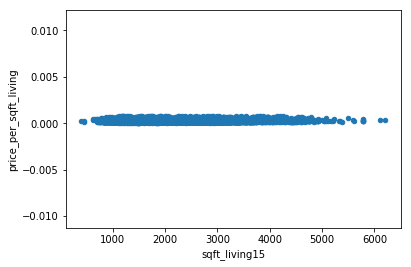

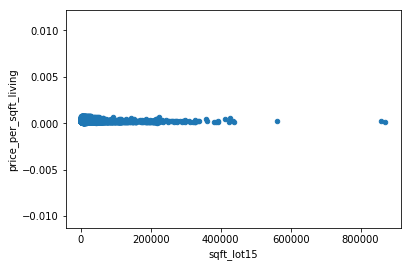

In [30]:
# さらに price に対する関係性を見るため、price x 他の変数の散布図を作成
for c in df_data.columns:
    if (c != 'price_per_sqft_living') & (c != 'date'):
        df_data[[c, 'price_per_sqft_living']].plot(kind='scatter', x=c, y='price_per_sqft_living')

### 考察2
延床面積当たりで見ても、あまり参考になる結果とはならなかった。。。  
### 最初の状態から地下室の有無を加えてみる

In [31]:
# 地下室面積ではなく、地下室があるかどうかを判断材料とする。
# 0: 地下室がない 1: 地下室がある
df_data['basement'] = np.array(df_data['sqft_basement'] != 0)*1
df_data['basement'].value_counts().sort_index()

# 重回帰分析で説明することを試みる

y = df_data["price"].values
X = df_data[["sqft_living", "grade", "bathrooms", "basement"]].values

multi_reg(X, y)

決定係数=0.5426407959075809
傾き=[ 0.00019121  0.10747382 -0.03697466  0.05838422] 切片=-0.6259533267783155
MSE=0.068
RMSE=0.262
MAE=0.165


### 考察3
決定係数が 0.537 -> 0.542 になったものの、大して変化せず。。。
### 最初の状態から改修の有無を加える

In [32]:
# リノベーション年はリノベーションしたかどうかに変換する
df_data['renovate'] = np.array(df_data['yr_renovated'] != 0)*1
df_data['renovate'].value_counts().sort_index()

# 重回帰分析で説明することを試みる

y = df_data["price"].values
X = df_data[["sqft_living", "grade", "bathrooms", "renovate"]].values

multi_reg(X, y)

決定係数=0.5466117258729933
傾き=[ 0.0001989   0.10349693 -0.03625276  0.18031925] 切片=-0.5977462389230053
MSE=0.068
RMSE=0.261
MAE=0.165


### 考察4
決定係数が 0.537 -> 0.546 になり、およそ 0.01 上昇だが、大きな寄与ではない。
### 最初の状態から建築年を加える

In [33]:
# 重回帰分析で説明することを試みる

y = df_data["price"].values
X = df_data[["sqft_living", "grade", "bathrooms", "yr_built"]].values

multi_reg(X, y)

決定係数=0.6057951640793025
傾き=[ 0.00015369  0.13873512  0.0482219  -0.00399551] 切片=6.930816155883202
MSE=0.06
RMSE=0.246
MAE=0.151


### 考察5
決定係数が 0.537 -> 0.605 になり、およそ 0.07 上昇。
### 地域性考慮のため、緯度・経度を加える

In [34]:
# 重回帰分析で説明することを試みる

y = df_data["price"].values
X = df_data[["sqft_living", "grade", "bathrooms", "lat", "long"]].values

multi_reg(X, y)

決定係数=0.6115043361785699
傾き=[ 2.14242639e-04  8.71590692e-02 -2.12618718e-02  6.08115469e-01
 -3.10891650e-01] 切片=-67.44623503844367
MSE=0.058
RMSE=0.242
MAE=0.146


### 考察6
決定係数が 0.537 -> 0.611 になり、およそ 0.07 上昇。
### 眺望を加える

In [35]:
# 重回帰分析で説明することを試みる

y = df_data["price"].values
X = df_data[["sqft_living", "grade", "bathrooms", "view"]].values

multi_reg(X, y)

決定係数=0.5741110667997351
傾き=[ 0.00018105  0.0948641  -0.02630795  0.09577   ] 切片=-0.530503317769268
MSE=0.064
RMSE=0.253
MAE=0.161


### 考察7
決定係数が 0.537 -> 0.574 になり、およそ 0.035 上昇。
### 上記全てを加える

In [36]:
# 重回帰分析で説明することを試みる

y = df_data["price"].values
X = df_data[["sqft_living", "grade", "bathrooms", "basement", "yr_built", "lat", "long", "view"]].values

multi_reg(X, y)

決定係数=0.6703165813768993
傾き=[ 1.61997025e-04  1.05777182e-01  4.05299949e-02 -3.04454924e-02
 -2.79780567e-03  5.55526802e-01 -8.80537597e-02  8.10103898e-02] 切片=-32.36815969967346
MSE=0.051
RMSE=0.225
MAE=0.134


### Day1分考察まとめ
#### 試行1  
最初の説明変数として、price と相関関係の高い、sqft_living/grade/bathrooms を採用。  
sqft_above/sqft_living15 も price と相関関係が高そうだったが、sqft_living と同じ意味なので、多重共線性を避ける意味でも採用は見送った。  
手法：重回帰分析
決定係数：0.537
#### 試行2  
sqft_living の影響を除くため、単位ft^2?当たりの価格に対する、各変数の相関関係を調べたが、あまり有益な情報とはならなかった。。。  
やり方が悪い？？
#### 試行3
地下室の面積ではなく、有無を説明変数に加えてみた。  
決定係数：0.542
#### 試行4
改修年ではなく、改修の有無を説明変数に加えてみた。  
決定係数：0.546
#### 試行5
建築年を説明変数に加えてみた。  
決定係数：0.605
#### 試行6
緯度・経度を説明変数に加えてみた。  
決定係数：0.611
#### 試行7
眺望度合いを説明変数に加えてみた。  
決定係数：0.574
#### 試行8
試行7まで実施した変数を全て説明変数に加えてみた。  
決定係数：0.670
#### 課題、今後の取り組み、気付いた点等
* 建築年を変数とするのではなく、建築年でクラス分けして、変数とするのはどうか。  
  -> 1: 1900-1920, 2: 1920-1940, 3: 1940-1960 ...
* 日付を説明変数に加えてみる  
  -> 月とか関係しないか。
* 外れ値の除去を試みた場合、全体の精度は上がるかどうか。
* VIF の計算

### Day2 の取り組み
* ランダムフォレストの利用
* CV によるハイパーパラメータの決定
* 精度向上のための考察・取り組み
* 今後の課題

In [37]:
# zip コードのone-hotベクトル化
# 月のone-hotベクトル化
# Day1の説明変数にプラスして、ランダムフォレストで分析
# CV によるパラメータ探索
# 考察

In [38]:
# zip コードのone-hotベクトル化
#df_data['zipcode_str'] = df_data['zipcode'].astype(str).map(lambda x:'zip_'+x)
#df_data = pd.concat([df_data, pd.get_dummies(df_data['zipcode_str'])], axis=1)
#display(df_data)

In [39]:
# date カラムからの月の one-hot ベクター化
#df_data['month'] = pd.to_datetime(df_data['date']).map(lambda x:'month'+str(x.month))
#display(df_data['month'])

#df_data = pd.concat([df_data, pd.get_dummies(df_data['month'], dtype=float)], axis=1)
#display(df_data)

In [40]:
# ランダムフォレストを使用
df_temp = df_data.drop(['id', 'date', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis=1)

#display(df_temp['zip_98092'].unique())

y = df_temp.loc[:, 'price']
X = df_temp[ df_temp.columns[df_temp.columns != 'price'] ]
#display(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

print("score=", forest.score(X_train, y_train))

score= 0.9988475670476178


### 考察
* スコアが0.99となっているが、過学習が生じているものと思われる。

### 課題
* zip_code, date カラムから one-hot ベクトルを作成したが、ランダムフォレストでエラーが生じたため、カラムとしての利用ができなかった  
  -> エラー解決が必要  
* 上記のエラーにはまったため、CVまで手が回らなかった
* 過学習を起こしていると思われるので、層の深さ等検討する必要がある